**Tokenization** is process of splitting text into meaningful segments

In [1]:
import spacy

Creating blank language object gives a tokenizer and an empty pipeline

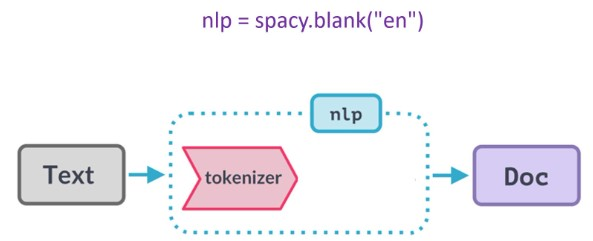

In [2]:
nlp = spacy.blank('en')

In [3]:
# Read the input data
text = "Revenue in the Food market amounts to nine million $ in 2023."
doc = nlp(text)

In [4]:
def checkTokenData(tokendata):
    if(tokendata.is_alpha):
        print(tokendata, " -> is alphabet")
    elif(tokendata.like_num):
        print(tokendata, " -> is digit")
    elif(tokendata.is_currency):
        print(tokendata, " -> is currency")
        

In [5]:
for token in doc:
    (checkTokenData(token))

Revenue  -> is alphabet
in  -> is alphabet
the  -> is alphabet
Food  -> is alphabet
market  -> is alphabet
amounts  -> is alphabet
to  -> is alphabet
nine  -> is alphabet
million  -> is alphabet
$  -> is currency
in  -> is alphabet
2023  -> is digit


**hindi language tokenizer**

In [6]:
## Hindi language

nlpHindi = spacy.blank("hi")
hindi_text = "पापा मुझे ५०००० ₹ का मोबाइल चाहिए"
dochindi = nlpHindi(hindi_text)

In [7]:
for token in dochindi:
    if (token.like_num) | (token.is_currency):
        print(token)

५००००
₹


**adding special rule in tokennizer**

In [8]:
# adding special rule in tokennizer

text_sp = "gimme double cheese extra large healthy pizza"
dox_sp = nlp(text_sp)
token_sp = [t for t in dox_sp]
token_sp

[gimme, double, cheese, extra, large, healthy, pizza]

In [9]:
from spacy.symbols import ORTH

nlp.tokenizer.add_special_case('gimme',[
    {ORTH:"gim"},
    {ORTH:"me"}
])

text_sp = "gimme double cheese extra large healthy pizza"
dox_sp = nlp(text_sp)
token_sp = [t for t in dox_sp]
token_sp

[gim, me, double, cheese, extra, large, healthy, pizza]

**Tokenizing sentences**

In [10]:
text = "Dr. A.P.J Kalam served as the 11th president of India, succeeding K. R. Narayanan. He won the 2002 presidential election with an electoral vote of 922,884, surpassing the 107,366 votes won by Lakshmi Sahgal. His term lasted from 25 July 2002, to 25 July 2007."

In [11]:
nlp.add_pipe('sentencizer')

In [12]:
nlp.pipe_names

['sentencizer']

In [13]:
doc = nlp(text)
for sentence in doc.sents:
    print(sentence)

Dr. A.P.J Kalam served as the 11th president of India, succeeding K. R. Narayanan.
He won the 2002 presidential election with an electoral vote of 922,884, surpassing the 107,366 votes won by Lakshmi Sahgal.
His term lasted from 25 July 2002, to 25 July 2007.


**Exercise**

In [15]:
# Get the URLs from the given text

text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

doc = nlp(text)
data_websites = [token.text for token in doc if token.like_url ] 
data_websites

['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

In [16]:
# Figure out all transactions from this text with amount and currency

transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"
doc = nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text, doc[token.i+1].text) 

two $
500 €
